# Technical Indicator 

- Technical indicator là phép tính toán được sử dụng trong thị trường tài chính để phân tích dữ liệu về giá và khối lượng giao dịch, mục tiêu của việc tính toán là tìm kiếm các điểm mua, bán tiềm năng
- Trong phần này, ta sẽ đi qua những indicator cơ bản và các chiến lược có thể áp dụng với chúng 

In [1]:
import numpy as np 
import talib 
import pandas as pd 

import matplotlib.pyplot as plt    

In [2]:
import datetime as dt

import yfinance as yf 

# yf.pdr_override()
# end = dt.datetime.now()
# start = end - dt.timedelta(days=4000)
# meta_data = web.get_data_yahoo('GOOG', start, end)
# meta_data.head()


meta_data = pd.read_csv('..\Data\META_4000_days.csv')


In [3]:
meta_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-29,20.006262,20.490696,20.000034,20.400036,20.400036,92376959
1,2013-04-30,20.398540,20.613735,20.365664,20.537271,20.537271,92613843
2,2013-05-01,20.504644,20.541006,20.332788,20.434158,20.434158,58418148
3,2013-05-02,20.425940,20.785839,20.399788,20.662802,20.662802,81034603
4,2013-05-03,20.845865,21.090946,20.821955,21.064047,21.064047,100880714


## Resistance và Support indicator 

- Sử dụng chiều rộng của cửa sổ là 200, tạo đường resist và đường support. 
- Chiến lược: sau khi giá chạm vào đường support -> mua và bán khi chạm đường resist và ngược lại 

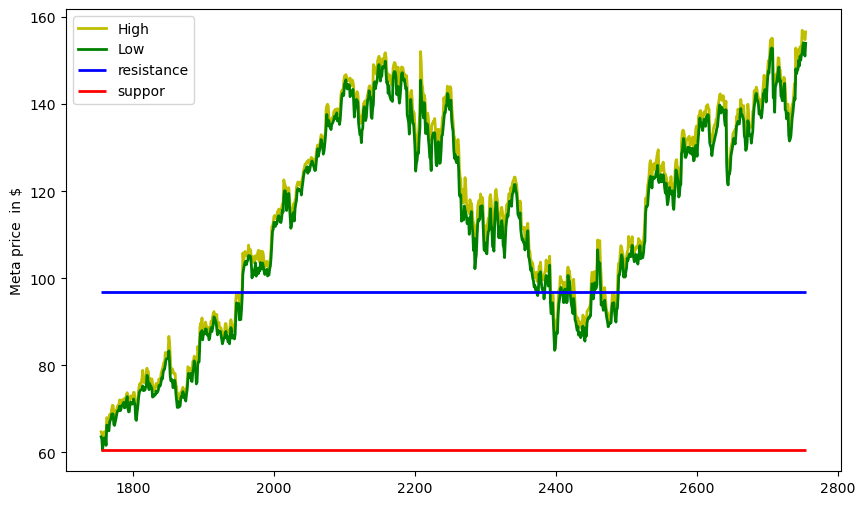

In [4]:
sub_meta_data = meta_data.tail(1000)
low = sub_meta_data['Low']
high = sub_meta_data['High']
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111, ylabel = 'Meta price  in $')
high.plot(ax=ax1, color='y', lw= 2)
low.plot(ax=ax1, color = 'g', lw=2)
plt.hlines(high.head(200).max(), low.index.values[0], low.index.values[-1], linewidth = 2, color='blue', label='resistance')
plt.hlines(low.head(200).min(), low.index.values[0], low.index.values[-1], linewidth = 2, color = 'red', label='suppor')
plt.legend()

- Dựa vào hình trên có thể thấy, chiến lược đầu tư này không hiệu quả, sau khi vẽ xong support và resist, khi giá chạm vào resist lần thứ 2 => short position => giá không chạm vào đường support một lần nào dẫn tới không kết thúc được short position 